# load set of acoustic files, test library

In [1]:
import pandas as pd
#from acoustics import Signal
import matplotlib.pyplot as plt

# cognac data and tools
import cognac.insitu as insi

In [2]:
root_dir = '/Users/aponte/Current_projects/cognac/campagnes_techno/2019_lopstech/source_qualif/'
sequence, fs = insi.source.load_emission_sequence(root_dir+'sequence_cos_A1/')

No handles with labels found to put in legend.


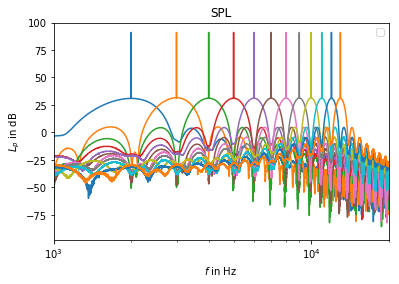

In [6]:
#sequence[0].plot_power_spectrum()
ax = plt.subplot(111)
for i, s in enumerate(sequence):
    s.plot_power_spectrum(xlim=[1e3,2e4], ax=ax, label=str(i))
    plt.close() # should not be necessary ...
#plt.legend()

In [8]:
fs

{76125}

In [10]:
data_dir = root_dir+'data/loggerhead/'
arec = insi.arecorder.acoustic_recorder(data_dir, 'logger_head')

In [11]:
arec.df.head()

,file_name,file_path,ID,gain,Voltage,Version
time,,,,,,
2019-04-11 09:37:50,20190411T093750.wav,/Users/aponte/Current_projects/cognac/campagne...,42332290775159,-3.86,4.03,2019-03-26
2019-04-11 09:38:50,20190411T093850.wav,/Users/aponte/Current_projects/cognac/campagne...,42332290775159,-3.86,4.05,2019-03-26
2019-04-11 09:39:50,20190411T093950.wav,/Users/aponte/Current_projects/cognac/campagne...,42332290775159,-3.86,4.03,2019-03-26
2019-04-11 09:40:50,20190411T094050.wav,/Users/aponte/Current_projects/cognac/campagne...,42332290775159,-3.86,4.06,2019-03-26
2019-04-11 09:41:50,20190411T094150.wav,/Users/aponte/Current_projects/cognac/campagne...,42332290775159,-3.86,4.05,2019-03-26


In [12]:
t0 = arec.df.index[10]-pd.Timedelta(10,'second')
t1 = t0+pd.Timedelta(1,'minute')
print(t0,t1)

2019-04-11 09:47:39 2019-04-11 09:48:39


In [13]:
s, t = arec[t0:t1]

In [16]:
s.fs

44100

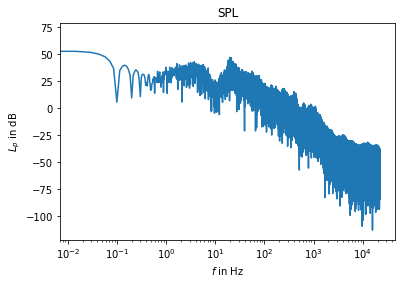

In [14]:
fig = s.plot_power_spectrum()

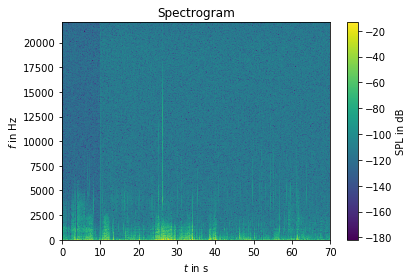

In [12]:
fig = s.plot_spectrogram()

In [ ]:
#s.amplitude_envelope().plot()

In [17]:
sequence[0].resample?

Object `resample` not found.


In [ ]:
sequence[0].resample